In [1]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user


ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==2.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflowjs 4.16.0 requires packaging~=23.1, but you have packaging 21.3 which i

In [2]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

2024-02-21 15:55:21.988947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 15:55:21.989005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 15:55:21.990384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#assigning directory
directory=pathlib.Path("/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images")

print(directory)

/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images


In [4]:
# Just needed in case you'd like to append it to an array
data = []

print(os.listdir('.'))

for filename in os.listdir("."):
    if filename.endswith("png"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

print(data)

['__notebook__.ipynb']
[]


In [5]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.png')))
#print(list(directory.glob('/*.jpg')))
image_count

3662

In [6]:
#creating dictionary of flower species
DR_image={
    "Mild":list(directory.glob('Mild/*.png')),
    "Moderate":list(directory.glob('Moderate/*.png')),
     "No_DR":list(directory.glob('No_DR/*.png')),
     "Proliferate_DR":list(directory.glob('Proliferate_DR/*.png')),
     "Severe":list(directory.glob('Severe/*.png'))

}

In [7]:
DR_image

{'Mild': [PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/f481f76a6b75.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/abdb365cacbc.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/33ffddea8c6e.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/059bc89df7f4.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/278aa860dffd.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/d66b6f333dc7.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/a8c950a99107.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/cab3dfa7962d.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/63363410389a.png'),
  PosixPath('/kaggle/input/diabetic-re

In [8]:
#Different species list
keys=["Mild","Moderate","No_DR","Proliferate_DR","Severe"]

In [9]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in DR_image.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
DR_image

completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed


{'Mild': [PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/f481f76a6b75.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/abdb365cacbc.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/33ffddea8c6e.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/059bc89df7f4.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/278aa860dffd.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/d66b6f333dc7.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/a8c950a99107.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/cab3dfa7962d.png'),
  PosixPath('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/63363410389a.png'),
  PosixPath('/kaggle/input/diabetic-re

In [10]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [11]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

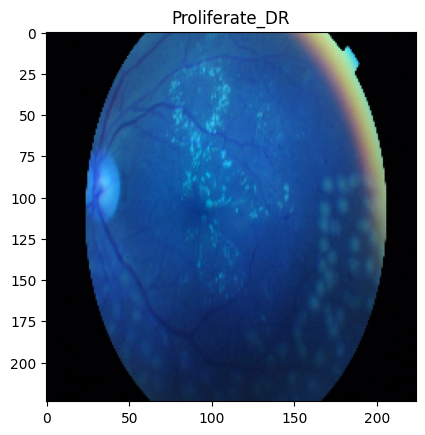

In [12]:
print_image(x_train[15],y_train[15])

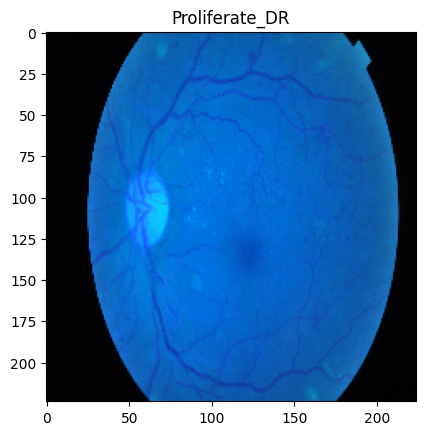

In [13]:
print_image(x_test[6],y_test[6])

In [14]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [15]:
x_train_scaled.shape

(2746, 224, 224, 3)

In [16]:
y_train=np.array(y_train)
y_train.shape

(2746,)

In [17]:
from tensorflow.keras import layers, models, optimizers, callbacks
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5,activation="softmax")])
model.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
from tensorflow.keras import layers, models, optimizers, callbacks

model = models.Sequential([
    layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [19]:
model.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20


I0000 00:00:1708530976.955467      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 [==============================] - 17s 104ms/step - loss: 6.8353 - accuracy: 0.5674
Epoch 2/20
86/86 [==============================] - 7s 81ms/step - loss: 1.6195 - accuracy: 0.5943
Epoch 3/20
86/86 [==============================] - 7s 82ms/step - loss: 1.3136 - accuracy: 0.5830
Epoch 4/20
86/86 [==============================] - 7s 81ms/step - loss: 1.2491 - accuracy: 0.5561
Epoch 5/20
86/86 [==============================] - 7s 81ms/step - loss: 1.2492 - accuracy: 0.5335
Epoch 6/20
86/86 [==============================] - 7s 81ms/step - loss: 1.2387 - accuracy: 0.5335
Epoch 7/20
86/86 [==============================] - 7s 81ms/step - loss: 1.1744 - accuracy: 0.5666
Epoch 8/20
86/86 [==============================] - 7s 81ms/step - loss: 1.2231 - accuracy: 0.5652
Epoch 9/20
86/86 [==============================] - 7s 82ms/step - loss: 1.1523 - accuracy: 0.5608
Epoch 10/20
86/86 [==============================] - 7s 82ms/step - loss: 1.1359 - accuracy: 0.5863
Epoch 11/20
86/86 

In [20]:
model.evaluate(x_test_scaled,np.array(y_test))

29/29 [==============================] - 2s 50ms/step - loss: 0.9242 - accuracy: 0.7041


[0.9241760969161987, 0.7041484713554382]

In [21]:
model1=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(5,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])

In [22]:
model1.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [23]:
model1.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20
86/86 [==============================] - 4s 21ms/step - loss: 2.1938 - accuracy: 0.4621
Epoch 2/20
86/86 [==============================] - 2s 18ms/step - loss: 1.0542 - accuracy: 0.6198
Epoch 3/20
86/86 [==============================] - 2s 18ms/step - loss: 1.0010 - accuracy: 0.6763
Epoch 4/20
86/86 [==============================] - 2s 18ms/step - loss: 0.9436 - accuracy: 0.6821
Epoch 5/20
86/86 [==============================] - 2s 18ms/step - loss: 0.9085 - accuracy: 0.6930
Epoch 6/20
86/86 [==============================] - 2s 18ms/step - loss: 0.9105 - accuracy: 0.6908
Epoch 7/20
86/86 [==============================] - 2s 18ms/step - loss: 0.8747 - accuracy: 0.6941
Epoch 8/20
86/86 [==============================] - 2s 18ms/step - loss: 0.8415 - accuracy: 0.7130
Epoch 9/20
86/86 [==============================] - 2s 18ms/step - loss: 0.8119 - accuracy: 0.7152
Epoch 10/20
86/86 [==============================] - 2s 18ms/step - loss: 0.7842 - accuracy: 0.7218
Epoch 11/

In [24]:
model1.evaluate(x_test_scaled,np.array(y_test))

29/29 [==============================] - 1s 14ms/step - loss: 0.7891 - accuracy: 0.7271


[0.7890516519546509, 0.7270742654800415]

In [25]:
model2=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(5,activation="softmax")
])
model2.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
model2.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20
86/86 [==============================] - 2s 10ms/step - loss: 1.6001 - accuracy: 0.5794
Epoch 2/20
86/86 [==============================] - 1s 10ms/step - loss: 1.0295 - accuracy: 0.6420
Epoch 3/20
86/86 [==============================] - 1s 10ms/step - loss: 1.0398 - accuracy: 0.6238
Epoch 4/20
86/86 [==============================] - 1s 10ms/step - loss: 1.0133 - accuracy: 0.6431
Epoch 5/20
86/86 [==============================] - 1s 10ms/step - loss: 0.9773 - accuracy: 0.6588
Epoch 6/20
86/86 [==============================] - 1s 10ms/step - loss: 1.0064 - accuracy: 0.6475
Epoch 7/20
86/86 [==============================] - 1s 10ms/step - loss: 0.9457 - accuracy: 0.6686
Epoch 8/20
86/86 [==============================] - 1s 10ms/step - loss: 0.9230 - accuracy: 0.6770
Epoch 9/20
86/86 [==============================] - 1s 10ms/step - loss: 0.9068 - accuracy: 0.6817
Epoch 10/20
86/86 [==============================] - 1s 10ms/step - loss: 0.9104 - accuracy: 0.6865
Epoch 11/

In [27]:
model2.evaluate(x_test_scaled,np.array(y_test))

29/29 [==============================] - 0s 9ms/step - loss: 0.8706 - accuracy: 0.6954


[0.8705537915229797, 0.6954148411750793]

In [28]:
model3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(5,activation="softmax")
])
model3.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
model3.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20
86/86 [==============================] - 3s 19ms/step - loss: 2.3779 - accuracy: 0.4672
Epoch 2/20
86/86 [==============================] - 2s 19ms/step - loss: 1.0221 - accuracy: 0.6300
Epoch 3/20
86/86 [==============================] - 2s 19ms/step - loss: 0.9513 - accuracy: 0.6661
Epoch 4/20
86/86 [==============================] - 2s 19ms/step - loss: 0.9209 - accuracy: 0.6763
Epoch 5/20
86/86 [==============================] - 2s 19ms/step - loss: 0.8779 - accuracy: 0.6916
Epoch 6/20
86/86 [==============================] - 2s 19ms/step - loss: 0.8403 - accuracy: 0.6992
Epoch 7/20
86/86 [==============================] - 2s 19ms/step - loss: 0.8333 - accuracy: 0.7014
Epoch 8/20
86/86 [==============================] - 2s 19ms/step - loss: 0.8312 - accuracy: 0.7127
Epoch 9/20
86/86 [==============================] - 2s 19ms/step - loss: 0.8227 - accuracy: 0.7050
Epoch 10/20
86/86 [==============================] - 2s 19ms/step - loss: 0.8219 - accuracy: 0.7072
Epoch 11/

In [30]:
model3.evaluate(x_test_scaled,np.array(y_test))

29/29 [==============================] - 0s 11ms/step - loss: 0.8316 - accuracy: 0.7009


[0.8315584063529968, 0.7008733749389648]

In [31]:
model4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5,activation="softmax")
])
model4.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [32]:
model4.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20
86/86 [==============================] - 3s 20ms/step - loss: 2.5919 - accuracy: 0.5532
Epoch 2/20
86/86 [==============================] - 2s 20ms/step - loss: 0.9266 - accuracy: 0.6595
Epoch 3/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8655 - accuracy: 0.6890
Epoch 4/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8501 - accuracy: 0.6908
Epoch 5/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8235 - accuracy: 0.7017
Epoch 6/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8081 - accuracy: 0.7160
Epoch 7/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8026 - accuracy: 0.7152
Epoch 8/20
86/86 [==============================] - 2s 20ms/step - loss: 0.7842 - accuracy: 0.7283
Epoch 9/20
86/86 [==============================] - 2s 20ms/step - loss: 0.7828 - accuracy: 0.7152
Epoch 10/20
86/86 [==============================] - 2s 20ms/step - loss: 0.7705 - accuracy: 0.7167
Epoch 11/

In [33]:
model4.evaluate(x_test_scaled,np.array(y_test))

29/29 [==============================] - 0s 11ms/step - loss: 0.8224 - accuracy: 0.7129


[0.8223703503608704, 0.7128821015357971]

In [34]:
model5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(5,activation="softmax")
])
model5.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [35]:
model5.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20
86/86 [==============================] - 3s 19ms/step - loss: 1.3326 - accuracy: 0.5546
Epoch 2/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8888 - accuracy: 0.6828
Epoch 3/20
86/86 [==============================] - 2s 20ms/step - loss: 0.8295 - accuracy: 0.7054
Epoch 4/20
86/86 [==============================] - 2s 19ms/step - loss: 0.7876 - accuracy: 0.7189
Epoch 5/20
86/86 [==============================] - 2s 20ms/step - loss: 0.7677 - accuracy: 0.7261
Epoch 6/20
86/86 [==============================] - 2s 20ms/step - loss: 0.7462 - accuracy: 0.7221
Epoch 7/20
86/86 [==============================] - 2s 20ms/step - loss: 0.7577 - accuracy: 0.7247
Epoch 8/20
86/86 [==============================] - 2s 19ms/step - loss: 0.7558 - accuracy: 0.7261
Epoch 9/20
86/86 [==============================] - 2s 19ms/step - loss: 0.7494 - accuracy: 0.7261
Epoch 10/20
86/86 [==============================] - 2s 19ms/step - loss: 0.7253 - accuracy: 0.7294
Epoch 11/

In [36]:
model5.evaluate(x_test_scaled,np.array(y_test))

29/29 [==============================] - 0s 11ms/step - loss: 0.8160 - accuracy: 0.7107


[0.8160023093223572, 0.710698664188385]

In [37]:
myCNN=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(5,activation="softmax")
])
myCNN.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [38]:
myCNN.fit(x_train_scaled,np.array(y_train),epochs=20, batch_size=32)

Epoch 1/20
86/86 [==============================] - 7s 49ms/step - loss: 5.4447 - accuracy: 0.6573
Epoch 2/20
86/86 [==============================] - 3s 38ms/step - loss: 17.6833 - accuracy: 0.7043
Epoch 3/20
86/86 [==============================] - 3s 38ms/step - loss: 15.7817 - accuracy: 0.6792
Epoch 4/20
86/86 [==============================] - 3s 38ms/step - loss: 21.6252 - accuracy: 0.6956
Epoch 5/20
86/86 [==============================] - 3s 38ms/step - loss: 8.1606 - accuracy: 0.5972
Epoch 6/20
86/86 [==============================] - 3s 38ms/step - loss: 17.7880 - accuracy: 0.6358
Epoch 7/20
86/86 [==============================] - 3s 38ms/step - loss: 5.1811 - accuracy: 0.4618
Epoch 8/20
86/86 [==============================] - 3s 38ms/step - loss: 2.0127 - accuracy: 0.5022
Epoch 9/20
86/86 [==============================] - 3s 38ms/step - loss: 8.2508 - accuracy: 0.5011
Epoch 10/20
86/86 [==============================] - 3s 38ms/step - loss: 1.8378 - accuracy: 0.5007
Epoch